In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import SimSpec

In [146]:
def lowPassFilter(signal, fc, b):
    N = int(np.ceil((4 / b)))
    if not N % 2:
        N += 1
    n = np.arange(N)
    sinc_func = np.sinc(2 * fc * (n - (N - 1) / 2.))
    window = 0.42 - 0.5 * np.cos(2 * np.pi * n / (N - 1)) + 0.08 * np.cos(4 * np.pi * n / (N - 1))
    sinc_func = sinc_func * window
    sinc_func = sinc_func / np.sum(sinc_func)
    return N, np.convolve(signal, sinc_func)

def highPassFilter(signal, fc, b):
    N = int(np.ceil((4 / b)))
    if not N % 2:
        N += 1
    n = np.arange(N)
 
    sinc_func = np.sinc(2 * fc * (n - (N - 1) / 2.))
    window = np.blackman(N)
    sinc_func = sinc_func * window
    sinc_func = sinc_func / np.sum(sinc_func)

    # reverse function
    sinc_func = -sinc_func
    sinc_func[(N - 1) // 2] += 1

    return N, np.convolve(signal, sinc_func)

In [209]:
x = np.linspace(0, 1000, 1001)
bkg = SimSpec.genBkg(x, nperiod=0.5, ampl=0.2, offset=10)
narrowEmit = SimSpec.genPeaks(x, npeaks=15, ampl=[1,5], width=[1,2], loc=[0.05, 0.95])
broadAbsorb = SimSpec.genPeaks(x, npeaks=2, ampl=[-20,-40], width=[40,50], loc=[0.2,0.8])
whiteNoise = SimSpec.genNoise(x, ampl=0.25)

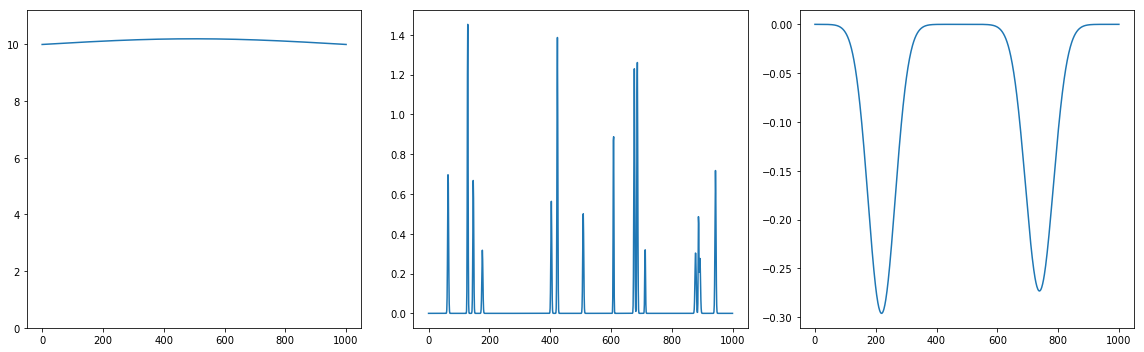

In [210]:
fig, axes = plt.subplots(1, 3, figsize=(16,5), sharex=True)
ax0, ax1, ax2 = axes
ax0.plot(x, bkg)
ax0.set(ylim=[0, 1.1*np.max(bkg)])
ax1.plot(x, narrowEmit)
ax2.plot(x, broadAbsorb)
fig.tight_layout();

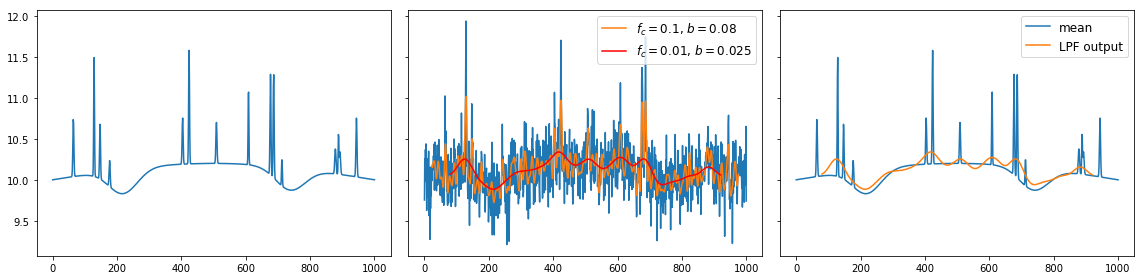

In [213]:
fig, axes = plt.subplots(1, 3, figsize=(16,4), sharex=True, sharey=True)
ax0, ax1, ax2 = axes

mean = bkg + narrowEmit + broadAbsorb
data = bkg + narrowEmit + broadAbsorb + whiteNoise

fc1, b1 = 0.1, 0.08
N1, lpf1 = lowPassFilter(data, fc=fc1, b=b1)
dN1 = (N1-1) // 2
lpf1 = lpf1[dN1:-dN1]

fc2, b2 = 0.01, 0.025
N2, lpf2 = lowPassFilter(data, fc=fc2, b=b2)
dN2 = (N2-1) // 2
lpf2 = lpf2[dN2:-dN2]

ax0.plot(x, mean)
ax1.plot(x, data)
ax1.plot(x[dN1:-dN1], lpf1[dN1:-dN1], label='$f_c={:g}$, $b={:g}$'.format(fc1, b1))
ax1.plot(x[dN2:-dN2], lpf2[dN2:-dN2], label='$f_c={:g}$, $b={:g}$'.format(fc2, b2), color='red')
ax2.plot(x, mean, label='mean')
ax2.plot(x[dN2:-dN2], lpf2[dN2:-dN2], label='LPF output')
ax2.legend(loc='best', fontsize=12)
ax1.legend(loc='best', fontsize=12)
fig.tight_layout();

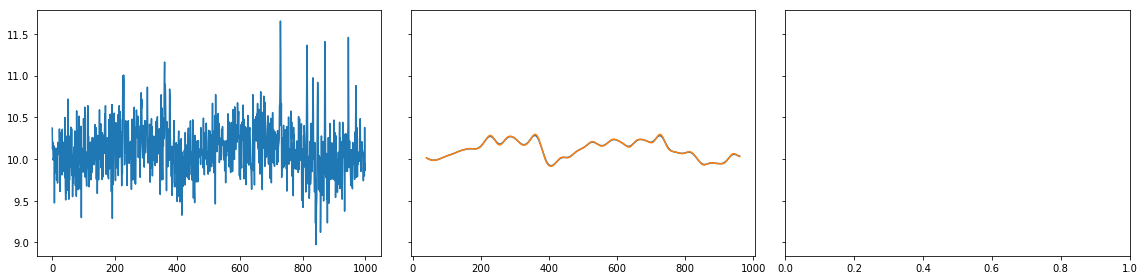

In [200]:
fig, axes = plt.subplots(1, 3, figsize=(16,4), sharey=True)
ax0, ax1, ax2 = axes

mean = bkg + narrowEmit + broadAbsorb
data = bkg + narrowEmit + broadAbsorb + whiteNoise

fc1, b1 = 0.001, 0.05
N1, hpf1 = highPassFilter(data, fc=fc1, b=b1)
dN1 = (N1-1) // 2
hpf1 = hpf1[dN1:-dN1]

ax0.plot(x, data)
# ax1.plot(x[20:-20], hpf1[20:-20])
ax1.plot(x[dN1:-dN1], (data-hpf1)[dN1:-dN1])
ax1.plot(x[dN2:-dN2], lpf2[dN2:-dN2])

fig.tight_layout();